# Data Analysis - Income and Houshold Size

Steps:

1 - Find percent change on cantonal or regional level
    Are there trends? Form groups of small communes vs big communes
    
2 - Extrapolate Income on communal level 2007 - 2016

3 - Analyse correlation(pearson R) between HH-size and Income on communal level

## Steps from Workbook DataAnalysis

In [70]:
%matplotlib inline
import os
import pandas as pd
import json
import folium
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import itertools

In [71]:
data_folder = './data/wrangled_data/'
data_incomes = './data/Incomes.csv'
map_folder = './data/map_data/'

In [72]:
# the cleaned and wrangled data from the notebook "Data Wrangling" is imported and numerous arrays are created
array_names = []

incomes = pd.read_csv(data_incomes)

for i in os.listdir(data_folder):
    globals()['%s' %i[:-4]] = pd.read_csv(data_folder + str(i))
    array_names.append(i[:-4])
    
#contains the list of all availble arrays
pd.DataFrame(array_names, columns=['Array Name']).sort_values(['Array Name']).head()

TypeError: 'str' object is not callable

### New

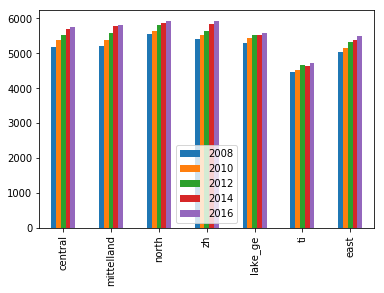

,2008,2010,2012,2014,2016
central,5185,5392,5520,5684,5756
mittelland,5200,5373,5583,5773,5803
north,5560,5647,5814,5856,5932
zh,5415,5513,5651,5846,5921
lake_ge,5284,5425,5517,5515,5583
ti,4460,4514,4664,4640,4722
east,5050,5143,5308,5367,5482


In [73]:
#create table for median incomes for all regions and years available
regions = ['central', 'mittelland', 'north', 'zh', 'lake_ge', 'ti', 'east']
wages_years = ['2008', '2010', '2012', '2014', '2016']

med_income_region = pd.DataFrame(columns=wages_years, index=regions)

for region in regions:
    for year in wages_years:
        str = region+year
        med_income_region.loc[region,year] = float(globals()['wages%s' %year+region][' Median'][1])

med_income_region.plot(kind='bar')
plt.show()

med_income_region

In [74]:
#create income dataframe with entries for 2008 as in 2007
cantons_path = './data/cantons.csv'
cantons = pd.read_csv(cantons_path)

header = ['Name', 'canton', '2008', '2010', '2012', '2014', '2016']
med_incomes = pd.DataFrame(columns=header, index=incomes.ID)
med_incomes[['Name','canton','2008']]=incomes[['NAME', 'KT', 'MEDREV']]
med_incomes= med_incomes.merge(cantons,left_on='canton', right_on='Kantonsnr').drop(columns=['canton'])

In [75]:
#extrapolate linearly from 2008(=2007) to dates
for ind in range(0,med_incomes.shape[0]): 
    for year in wages_years:
        region= med_incomes.loc[ind,'region']
        med_incomes.loc[ind,year] = med_incomes.loc[ind,'2008']*med_income_region.loc[region,year]/med_income_region.loc[region,'2008']   
med_incomes.set_index('Name')

,2008,2010,2012,2014,2016,code,Kantonsnr,region
Name,,,,,,,,
Affoltern am Albis,52.0200,52.9615,54.2872,56.1605,56.881,ZH,1,zh
Bonstetten,62.8786,64.0166,65.619,67.8833,68.7542,ZH,1,zh
Hausen am Albis,55.9826,56.9958,58.4225,60.4385,61.2138,ZH,1,zh
Hedingen,58.8480,59.913,61.4128,63.5319,64.347,ZH,1,zh
Kappel am Albis,56.7883,57.816,59.2633,61.3083,62.0948,ZH,1,zh
Knonau,54.5448,55.5319,56.922,58.8862,59.6417,ZH,1,zh
Maschwanden,50.7930,51.7122,53.0067,54.8358,55.5393,ZH,1,zh
Mettmenstetten,57.9394,58.988,60.4646,62.551,63.3535,ZH,1,zh
Obfelden,53.7722,54.7454,56.1157,58.0521,58.7969,ZH,1,zh


Due to the fusion of communes, every year the number of communes decreases. However, for a correlation analysis the number of communes compared must be equal. We therefore can only compare the communes we have data in common.

In [77]:
#drop unnecessary columns and clean commune names
hh_sizes2014=hh_sizes2014.drop(columns=['Unnamed: 0','not plausible hh'])
hh_sizes2014['Commune']=hh_sizes2014['Commune'].str.lstrip('0123456789')
hh_sizes2014.set_index('Commune')

KeyError: "['Unnamed: 0' 'not plausible hh'] not found in axis"

In [84]:
#join on communes available in both data sets
merged = pd.merge(left=hh_sizes2014, right=med_incomes, how='inner', left_on='Commune', right_on='Name')
merged

,Commune,Total,1-person households,2-person households,3-person households,4-person households,5-person households,6-person or larger households,Name,2008,2010,2012,2014,2016,code,Kantonsnr,region


In [31]:
#calculate the share of hh sizes for every commune
hh_sizes2014.iloc[:,3:9] = hh_sizes2014.iloc[:,3:9].div(hh_sizes2014['Total'].values,axis=0)

In [29]:
def LMplot (x,y):
    '''
    Function fits linear regression model and calculates corresponding statistics.
    Data and regression line is then plotted
     :input: pandas dataframe with columns named 'SelfEmployed' and 'IncomePerCap'
     :output: print statistics and plot linear regression
     :return: -
     '''

    #calculate linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

    #plot model and existing data
    plt.figure(figsize=(18, 10))
    plt.plot(x, y, 'o',ms=2, label='original data')
    plt.plot(x, intercept + slope*x, 'r', label='fitted line')
    plt.legend()
    plt.xlabel('% Self-employed')
    plt.ylabel('Income per Capita [$]')
    plt.show()

    #print statistics
    print('''The formula for the fitted linear Model is: y = %f + %f * x \n \n r-value = %f
 p-value = %f \n Standard_error: %f''' % (intercept, slope,r_value, p_value, std_err)) 

In [80]:
hh_sizes2014

,Commune,Total,1-person households,2-person households,3-person households,4-person households,5-person households,6-person or larger households
0,Aeugst am Albis,1945,0.114139,0.280720,0.172751,0.261183,0.128535,0.042674
1,Affoltern am Albis,11316,0.140421,0.292860,0.167550,0.216684,0.104719,0.077766
2,Bonstetten,5272,0.115516,0.295144,0.175266,0.293627,0.092944,0.027504
3,Hausen am Albis,3426,0.112376,0.301226,0.171629,0.268535,0.096322,0.049912
4,Hedingen,3635,0.111417,0.292160,0.168363,0.294911,0.097662,0.035488
5,Kappel am Albis,1008,0.122024,0.273810,0.145833,0.265873,0.143849,0.048611
6,Knonau,2029,0.102021,0.273041,0.193691,0.270084,0.113356,0.047807
7,Maschwanden,663,0.120664,0.244344,0.144796,0.319759,0.120664,0.049774
8,Mettmenstetten,4400,0.101136,0.299545,0.177273,0.294545,0.103409,0.024091
9,Obfelden,4897,0.109659,0.283030,0.180110,0.264652,0.120482,0.042067


In [18]:
def hhcorr (hhsize):
    hh_sizes.iloc[:,3:9] = hh_sizes2010.iloc[:,3:9].div(hh_sizes2010['Total'].values,axis=0)

,Unnamed: 0,Commune,Total,1-person households,2-person households,3-person households,4-person households,5-person households,6-person or larger households,not plausible hh
0,2,0001 Aeugst am Albis,1820.0,3.699054e-08,8.857825e-08,4.976306e-08,8.227493e-08,2.985784e-08,1.443129e-08,1
1,3,0002 Affoltern am Albis,10806.0,1.145178e-09,2.553469e-09,1.409876e-09,1.924216e-09,9.708256e-10,5.603050e-10,1
2,4,0003 Bonstetten,5153.0,4.231537e-09,1.124025e-08,6.818694e-09,1.096253e-08,3.325301e-09,1.081636e-09,1
3,5,0004 Hausen am Albis,3327.0,9.178216e-09,2.693725e-08,1.482635e-08,2.433042e-08,1.113334e-08,3.937401e-09,<1
4,6,0005 Hedingen,3398.0,8.691290e-09,2.477400e-08,1.491028e-08,2.558961e-08,9.430432e-09,3.211445e-09,0
5,7,0006 Kappel am Albis,918.0,1.279697e-07,3.128148e-07,1.434812e-07,2.792066e-07,2.520615e-07,7.109428e-08,0
6,8,0007 Knonau,1788.0,2.939048e-08,8.957100e-08,5.720648e-08,8.327304e-08,3.411395e-08,1.924377e-08,1
7,9,0008 Maschwanden,605.0,3.386844e-07,7.496214e-07,4.199686e-07,7.405898e-07,3.386844e-07,1.445053e-07,0
8,10,0009 Mettmenstetten,4132.0,4.762756e-09,1.408982e-08,9.950758e-09,1.649955e-08,6.520440e-09,6.747238e-09,12
9,11,0010 Obfelden,4620.0,5.212393e-09,1.308169e-08,6.966759e-09,1.322366e-08,6.135210e-09,2.230986e-09,1


In [28]:
hh_sizes2010=hh_sizes2010.dropna()
hh_sizes2010=hh_sizes2010[hh_sizes2010.Commune.str[0:4].str.isdigit()]

To Do:
- clean hh_sizes (better header,remove ()), change in datawrangling
- divide hhsizes / sum -> hh_percentage
- plot and take correlation between hhpercentage for different years and hh-sizes
